In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import datetime as dt
import tradingWithPython as twp
import pandas as pd
import numpy as np



In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
twp.extra.setNotebookStyle()

In [6]:
twp.extra.setNotebookStyle()

In [7]:
hd = twp.yahooFinance.getHistoricData('000001.SS')
hist = hd['adj_close']

Got 6614 days of data


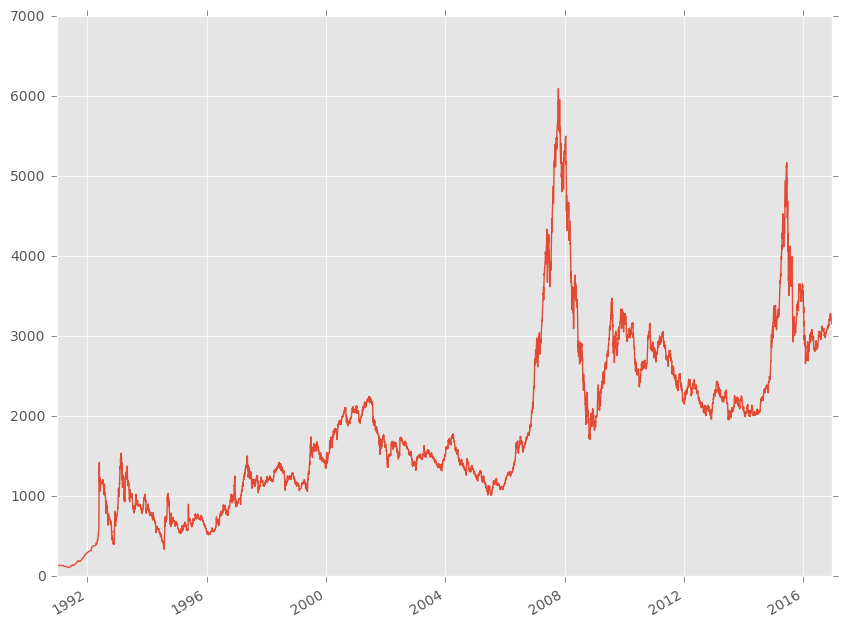

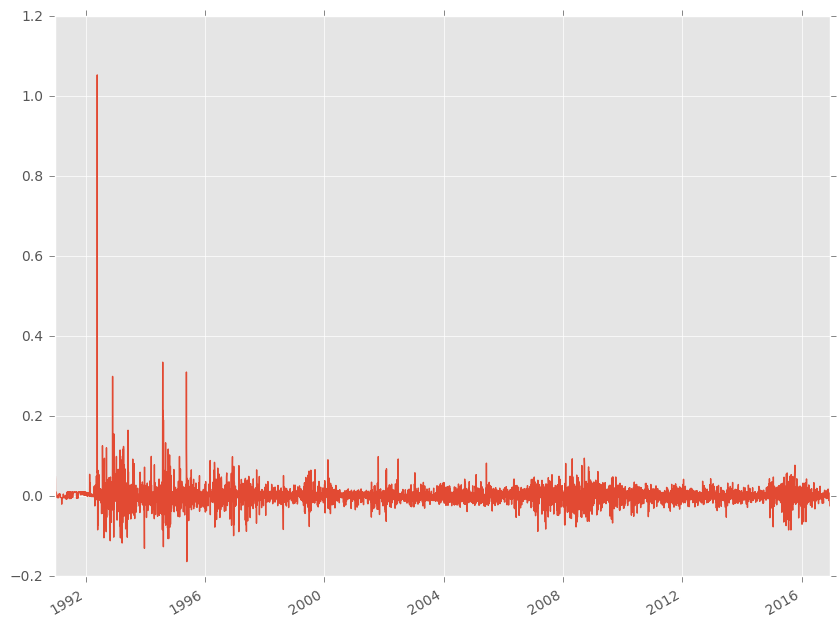

In [8]:
mpl.style.use('ggplot')
figsize(10,8)
hist.plot()
plt.grid(True)
figure() 
dr = hist.pct_change()
dr.plot()

In [9]:
def splitToWeekday(s):
    '''
    function to attribute returns in function of the weekdays
    parameters:
    -----------
    s: dataframe
    returns:
    --------
    dataframe with weekday as columns
    '''
    df = pd.DataFrame(index=s.index)
    df['data']=s
    df['weekday']=0
    
    for index in df.index:
        wd = index.date().isoweekday()
        df.set_value(index, 'weekday', wd)
    
    out = pd.DataFrame(index=df.index, columns=list(range(1, 6)))
    
    for iDay in range(1, 6):
        out[iDay] = df[df['weekday']==iDay]['data']
    out = out.fillna(value=0)
    out.columns=['Mo', 'Tu', 'We', 'Th', 'Fr']
    return out    

In [10]:
dayre = splitToWeekday(dr)

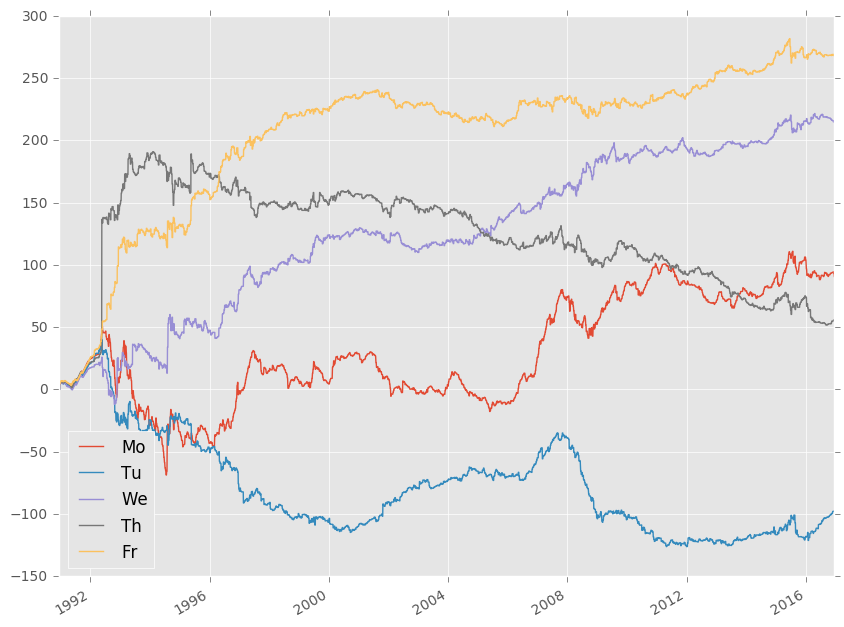

In [11]:
(100*dayre).cumsum().plot(grid=True)

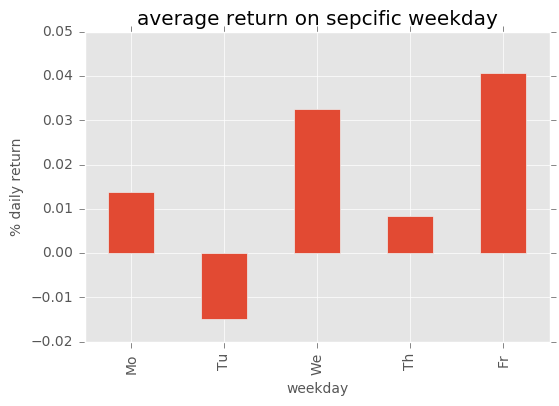

In [12]:
figsize(6, 4)
(100*dayre).mean().plot(kind='bar')
plt.title('average return on sepcific weekday')
plt.xlabel('weekday', size=10)
plt.ylabel('% daily return', size=10)
plt.grid(True)

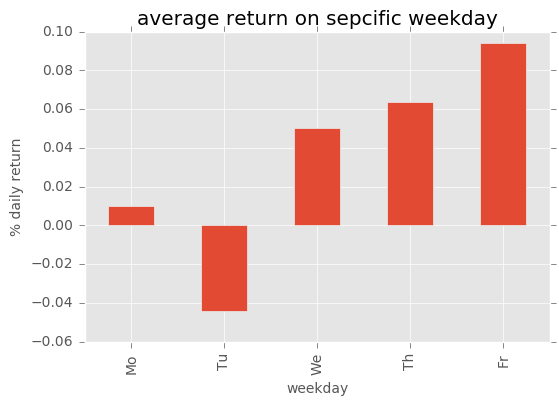

In [13]:
figsize(6, 4)
(100*dayre.ix[:2500,:]).mean().plot(kind='bar') # .ix[:2500,:] indexing selects first 2500 days of data
plt.title('average return on sepcific weekday')
plt.xlabel('weekday', size=10)
plt.ylabel('% daily return', size=10)
plt.grid(True)

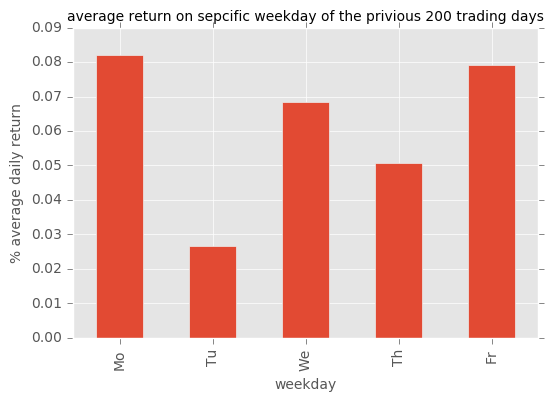

In [14]:
(100*dayre.ix[-600:-400,:]).mean().plot(kind='bar') # .ix[2500:,:] indexing selects data after 2500 days
plt.title('average return on sepcific weekday of the privious 200 trading days', size=10)
plt.xlabel('weekday', size=10)
plt.ylabel('% average daily return', size=10)
plt.grid(True)

In [50]:
import tushare as ts
zlth = ts.get_k_data('600737', ktype='d', start='2016-01-01', end='2016-12-12')
zlth['date'] = pd.to_datetime(zlth['date'])
zlth.set_index('date')


timed out
timed out


,open,close,high,low,volume,code
date,,,,,,
2016-01-04,14.48,12.98,14.49,12.98,288871.0,600737
2016-01-05,12.17,12.59,13.15,11.72,508729.0,600737
2016-01-06,12.75,12.90,13.05,12.62,345729.0,600737
2016-01-07,12.68,11.61,12.68,11.61,108064.0,600737
2016-01-08,11.89,11.64,12.23,10.57,438677.0,600737
...,...,...,...,...,...,...
2016-12-06,11.90,11.81,11.95,11.77,141601.0,600737
2016-12-07,11.84,12.01,12.02,11.77,184344.0,600737
2016-12-08,12.00,12.10,12.31,11.87,303354.0,600737


In [46]:
date = zlth.ix[2,0].strftime('%Y-%m-%d') #调用index，转换为固定格式的str
date 

'2016'

In [49]:
zlthcl = zlth['close']
zlthcl

0      12.98
1      12.59
2      12.90
3      11.61
4      11.64
       ...  
210    11.81
211    12.01
212    12.10
213    12.15
214    11.82
Name: close, dtype: float64